### Flood Control System
- Predicts the risk of floods based on monthly average rainfall.
- Dataset used is Kerala Dataset from Kaggle.

In [1]:
# Installing Libraries: Importing modules from packages

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier

import keras
from keras.models import Sequential
from keras.layers import Dense
from sklearn.neural_network import MLPClassifier

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

from sklearn.metrics import classification_report, confusion_matrix
from sklearn.model_selection import GridSearchCV, cross_val_score
import sklearn.metrics as metrics
from sklearn.metrics import accuracy_score, roc_auc_score
import warnings

In [2]:
# Data Gathering: Importing the dataset 

data = pd.read_csv(r'C:\path\Dataset.csv')

In [3]:
# Data Exploration: Drawing insights from data

data.head(10)

,SUBDIVISION,YEAR,JAN,FEB,MAR,APR,MAY,JUN,JUL,AUG,SEP,OCT,NOV,DEC,ANNUAL RAINFALL,FLOODS
0,KERALA,1901,28.7,44.7,51.6,160.0,174.7,824.6,743.0,357.5,197.7,266.9,350.8,48.4,3248.6,YES
1,KERALA,1902,6.7,2.6,57.3,83.9,134.5,390.9,1205.0,315.8,491.6,358.4,158.3,121.5,3326.6,YES
2,KERALA,1903,3.2,18.6,3.1,83.6,249.7,558.6,1022.5,420.2,341.8,354.1,157.0,59.0,3271.2,YES
3,KERALA,1904,23.7,3.0,32.2,71.5,235.7,1098.2,725.5,351.8,222.7,328.1,33.9,3.3,3129.7,YES
4,KERALA,1905,1.2,22.3,9.4,105.9,263.3,850.2,520.5,293.6,217.2,383.5,74.4,0.2,2741.6,NO
5,KERALA,1906,26.7,7.4,9.9,59.4,160.8,414.9,954.2,442.8,131.2,251.7,163.1,86.0,2708.0,NO
6,KERALA,1907,18.8,4.8,55.7,170.8,101.4,770.9,760.4,981.5,225.0,309.7,219.1,52.8,3671.1,YES
7,KERALA,1908,8.0,20.8,38.2,102.9,142.6,592.6,902.2,352.9,175.9,253.3,47.9,11.0,2648.3,NO
8,KERALA,1909,54.1,11.8,61.3,93.8,473.2,704.7,782.3,258.0,195.4,212.1,171.1,32.3,3050.2,YES
9,KERALA,1910,2.7,25.7,23.3,124.5,148.8,680.0,484.1,473.8,248.6,356.6,280.4,0.1,2848.6,NO


In [4]:
# Data Exploration: Determining the shape of dataset

data.shape

(118, 16)

In [5]:
# Data Exploration: Summarizing the data 

data.describe()

,YEAR,JAN,FEB,MAR,APR,MAY,JUN,JUL,AUG,SEP,OCT,NOV,DEC,ANNUAL RAINFALL
count,118.000000,118.000000,118.000000,118.000000,118.000000,118.000000,118.000000,118.000000,118.000000,118.000000,118.000000,118.000000,118.000000,118.000000
mean,1959.500000,12.218644,15.633898,36.670339,110.330508,228.644915,651.617797,698.220339,430.369492,246.207627,293.207627,162.311017,40.009322,2925.405085
std,34.207699,15.473766,16.406290,30.063862,44.633452,147.548778,186.181363,228.988966,181.980463,121.901131,93.705253,83.200485,36.676330,452.169407
min,1901.000000,0.000000,0.000000,0.100000,13.100000,53.400000,196.800000,167.500000,178.600000,41.300000,68.500000,31.500000,0.100000,2068.800000
25%,1930.250000,2.175000,4.700000,18.100000,74.350000,125.050000,535.550000,533.200000,316.725000,155.425000,222.125000,93.025000,10.350000,2613.525000
50%,1959.500000,5.800000,8.350000,28.400000,110.400000,184.600000,625.600000,691.650000,386.250000,223.550000,284.300000,152.450000,31.100000,2934.300000
75%,1988.750000,18.175000,21.400000,49.825000,136.450000,264.875000,786.975000,832.425000,500.100000,334.500000,355.150000,218.325000,54.025000,3170.400000
max,2018.000000,83.500000,79.000000,217.200000,238.000000,738.800000,1098.200000,1526.500000,1398.900000,526.700000,567.900000,365.600000,202.300000,4473.000000


In [6]:
# Data Cleaning: Checking for missing values

data.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 118 entries, 0 to 117
Data columns (total 16 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   SUBDIVISION       118 non-null    object 
 1   YEAR              118 non-null    int64  
 2   JAN               118 non-null    float64
 3   FEB               118 non-null    float64
 4   MAR               118 non-null    float64
 5   APR               118 non-null    float64
 6   MAY               118 non-null    float64
 7   JUN               118 non-null    float64
 8   JUL               118 non-null    float64
 9   AUG               118 non-null    float64
 10  SEP               118 non-null    float64
 11  OCT               118 non-null    float64
 12  NOV               118 non-null    float64
 13  DEC               118 non-null    float64
 14   ANNUAL RAINFALL  118 non-null    float64
 15  FLOODS            118 non-null    object 
dtypes: float64(13), int64(1), object(2)
memory u

In [7]:
# Data Pre-Processing: 
#  FLOODS  YES -> 1
#  FLOODS  NO -> 0

data['FLOODS'].replace(['YES','NO'],[1,0],inplace=True)
data.head(10)

,SUBDIVISION,YEAR,JAN,FEB,MAR,APR,MAY,JUN,JUL,AUG,SEP,OCT,NOV,DEC,ANNUAL RAINFALL,FLOODS
0,KERALA,1901,28.7,44.7,51.6,160.0,174.7,824.6,743.0,357.5,197.7,266.9,350.8,48.4,3248.6,1
1,KERALA,1902,6.7,2.6,57.3,83.9,134.5,390.9,1205.0,315.8,491.6,358.4,158.3,121.5,3326.6,1
2,KERALA,1903,3.2,18.6,3.1,83.6,249.7,558.6,1022.5,420.2,341.8,354.1,157.0,59.0,3271.2,1
3,KERALA,1904,23.7,3.0,32.2,71.5,235.7,1098.2,725.5,351.8,222.7,328.1,33.9,3.3,3129.7,1
4,KERALA,1905,1.2,22.3,9.4,105.9,263.3,850.2,520.5,293.6,217.2,383.5,74.4,0.2,2741.6,0
5,KERALA,1906,26.7,7.4,9.9,59.4,160.8,414.9,954.2,442.8,131.2,251.7,163.1,86.0,2708.0,0
6,KERALA,1907,18.8,4.8,55.7,170.8,101.4,770.9,760.4,981.5,225.0,309.7,219.1,52.8,3671.1,1
7,KERALA,1908,8.0,20.8,38.2,102.9,142.6,592.6,902.2,352.9,175.9,253.3,47.9,11.0,2648.3,0
8,KERALA,1909,54.1,11.8,61.3,93.8,473.2,704.7,782.3,258.0,195.4,212.1,171.1,32.3,3050.2,1
9,KERALA,1910,2.7,25.7,23.3,124.5,148.8,680.0,484.1,473.8,248.6,356.6,280.4,0.1,2848.6,0


In [8]:
# Data Exploration: Correlation between Monthly-Rainfall and Flood

corel = data.iloc[:,[*range(2,14),15]].corr()
corel["FLOODS"]

JAN       0.145313
FEB      -0.035730
MAR       0.086739
APR       0.034392
MAY       0.242813
JUN       0.442531
JUL       0.442774
AUG       0.286690
SEP       0.376385
OCT       0.060088
NOV       0.238852
DEC       0.054326
FLOODS    1.000000
Name: FLOODS, dtype: float64

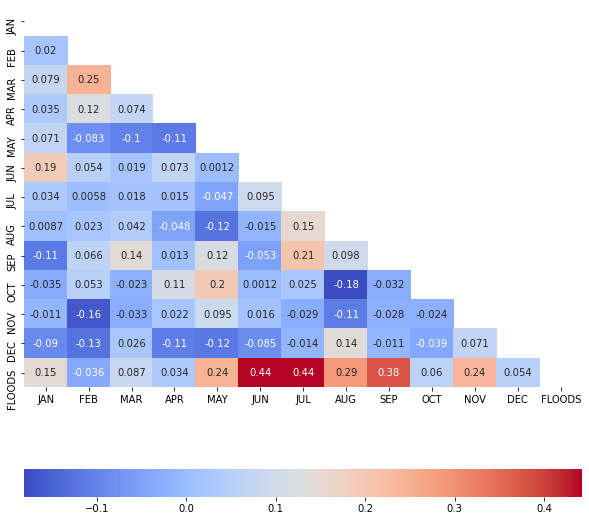

In [9]:
# Data Exploration: Visualizing Heatmap

plt.figure(figsize=(10,10))
dataplot = sns.heatmap(corel, annot = True, fmt='.2g', mask = np.triu(corel),cmap= 'coolwarm',cbar_kws= {'orientation': 'horizontal'})
plt.show()

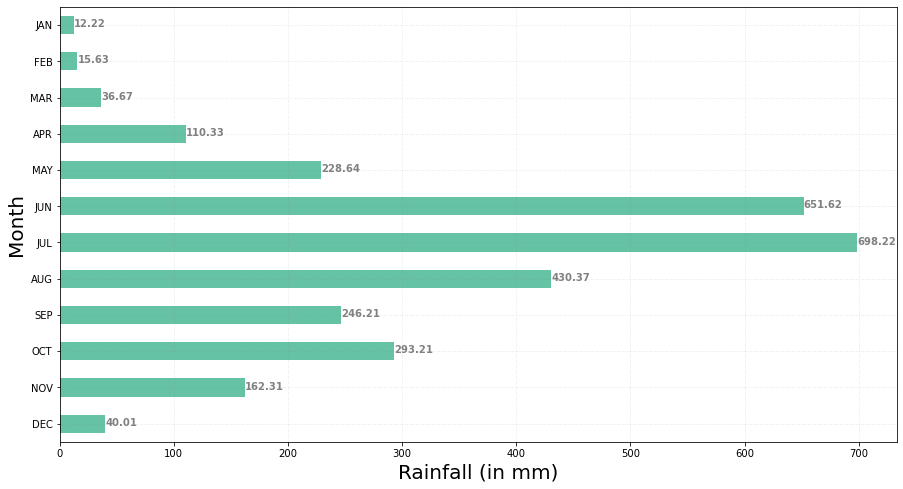

In [10]:
# Data Visualization: Monthly average rainfall

x1 = data.iloc[:,2:14]
y1=x1.mean()

ax = y1.plot.barh(figsize=(15,8),colormap='Set2')
plt.xlabel('Rainfall (in mm)',fontsize=20)
plt.ylabel('Month',fontsize=20)
 
# Adding x, y gridlines
ax.grid(b = True, color ='grey',linestyle ='-.', linewidth = 0.5, alpha = 0.2)

# Displaying top values
ax.invert_yaxis()

# Adding annotation to bars
for i in ax.patches:
    plt.text(i.get_width()+0.2,i.get_y()+0.3,str(round((i.get_width()), 2)),fontsize = 10,fontweight ='bold',color ='grey')

In [11]:
# Dividing the dataset into dependent and independent variables

x = data.iloc[:,2:14]
y = data.iloc[:, -1]

In [12]:
x.head()

,JAN,FEB,MAR,APR,MAY,JUN,JUL,AUG,SEP,OCT,NOV,DEC
0,28.7,44.7,51.6,160.0,174.7,824.6,743.0,357.5,197.7,266.9,350.8,48.4
1,6.7,2.6,57.3,83.9,134.5,390.9,1205.0,315.8,491.6,358.4,158.3,121.5
2,3.2,18.6,3.1,83.6,249.7,558.6,1022.5,420.2,341.8,354.1,157.0,59.0
3,23.7,3.0,32.2,71.5,235.7,1098.2,725.5,351.8,222.7,328.1,33.9,3.3
4,1.2,22.3,9.4,105.9,263.3,850.2,520.5,293.6,217.2,383.5,74.4,0.2


In [13]:
y.head()

0    1
1    1
2    1
3    1
4    0
Name: FLOODS, dtype: int64

In [14]:
# Splitting the data into Training and Testing sets

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.20, random_state = 42)

# Determining the shapes of training and testing sets

print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(94, 12)
(94,)
(24, 12)
(24,)


In [15]:
# Standard Scaling: Scaling the data for optimised predictions 

sc = StandardScaler()
x_train = sc.fit_transform(x_train)
x_test = sc.fit_transform(x_test)

***

## Train the Model

### Random Forest 

In [16]:
# Creating the model
rfc = RandomForestClassifier(n_estimators = 250,oob_score = True)

# Feeding the training set into the model
rfc.fit(x_train, y_train)

# Predicting the results for the test set
pred_rfc = rfc.predict(x_test)

print(classification_report(y_test, pred_rfc))

              precision    recall  f1-score   support

           0       1.00      0.90      0.95        10
           1       0.93      1.00      0.97        14

    accuracy                           0.96        24
   macro avg       0.97      0.95      0.96        24
weighted avg       0.96      0.96      0.96        24



In [17]:
x_train

array([[-0.51192874, -0.40716891, -0.81392992, ..., -0.41121996,
         1.20595256, -0.62038625],
       [-0.60039952, -0.68005608, -0.55715462, ...,  1.45161611,
        -0.63329382,  0.24438857],
       [-0.81136832, -0.52909722, -0.51542863, ...,  0.32750993,
        -0.33330978, -0.90346002],
       ...,
       [-0.81136832,  0.05151378, -0.57641276, ...,  1.54768412,
        -0.09356844,  0.25683137],
       [-0.45748518,  1.81657124, -0.55394492, ...,  0.53620941,
        -1.37464781,  0.90074643],
       [-0.7637302 ,  1.97333621,  1.41359588, ...,  1.28046045,
        -1.04515715, -0.87857441]])

In [18]:
# Creating the model
rfc = RandomForestClassifier(n_estimators = 250,oob_score = True)

# Feeding the training set into the model
rfc.fit(x_train, y_train)

# Predicting the results for the test set
pred_rfc = rfc.predict(x_test)

print(classification_report(y_test, pred_rfc))

              precision    recall  f1-score   support

           0       1.00      0.90      0.95        10
           1       0.93      1.00      0.97        14

    accuracy                           0.96        24
   macro avg       0.97      0.95      0.96        24
weighted avg       0.96      0.96      0.96        24



###  Decision Tree

In [19]:
dtc = DecisionTreeClassifier()
dtc.fit(x_train, y_train)
pred_dtc = dtc.predict(x_test)
print(classification_report(y_test, pred_dtc))

              precision    recall  f1-score   support

           0       0.60      0.60      0.60        10
           1       0.71      0.71      0.71        14

    accuracy                           0.67        24
   macro avg       0.66      0.66      0.66        24
weighted avg       0.67      0.67      0.67        24



### Support Vector Machine

In [20]:
svc = SVC()
svc.fit(x_train, y_train)
pred_svc = svc.predict(x_test)
print(classification_report(y_test, pred_svc))

              precision    recall  f1-score   support

           0       1.00      0.90      0.95        10
           1       0.93      1.00      0.97        14

    accuracy                           0.96        24
   macro avg       0.97      0.95      0.96        24
weighted avg       0.96      0.96      0.96        24



### K-Nearest Neighbors 

In [21]:
knn = KNeighborsClassifier()
knn.fit(x_train,y_train)
pred_knn=knn.predict(x_test)
print(classification_report(y_test, pred_knn))

              precision    recall  f1-score   support

           0       0.60      0.90      0.72        10
           1       0.89      0.57      0.70        14

    accuracy                           0.71        24
   macro avg       0.74      0.74      0.71        24
weighted avg       0.77      0.71      0.71        24



### Logistic Regression 

In [22]:
lor = LogisticRegression()
lor.fit(x_train, y_train)
pred_lor = lor.predict(x_test)
print(classification_report(y_test, pred_lor))

              precision    recall  f1-score   support

           0       1.00      0.90      0.95        10
           1       0.93      1.00      0.97        14

    accuracy                           0.96        24
   macro avg       0.97      0.95      0.96        24
weighted avg       0.96      0.96      0.96        24



In [23]:
# Conclusion: Comparing the results!

conclusion = pd.DataFrame({'Model': ["Random Forest","K-Nearest Neighbors","Logistic Regression","Decision Tree","Support Vector Machine"],
                           'Accuracy': [accuracy_score(y_test,pred_rfc),accuracy_score(y_test,pred_knn),
                                    accuracy_score(y_test,pred_lor),accuracy_score(y_test,pred_dtc),accuracy_score(y_test,pred_svc)]})
conclusion

,Model,Accuracy
0,Random Forest,0.958333
1,K-Nearest Neighbors,0.708333
2,Logistic Regression,0.958333
3,Decision Tree,0.666667
4,Support Vector Machine,0.958333


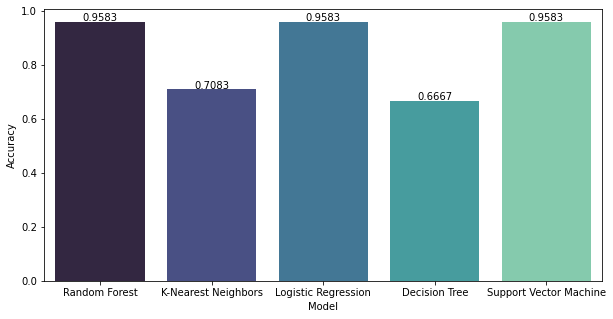

In [24]:
# Visualizing Results

plt.subplots(figsize=(10, 5))
axis = sns.barplot(x = 'Model', y = 'Accuracy', data =conclusion, palette="mako" )
axis.set(xlabel='Model', ylabel='Accuracy')

# Adding annotation to bars
for p in axis.patches:
    height = p.get_height()
    axis.text(p.get_x() + p.get_width()/2, height + 0.005, '{:1.4f}'.format(height), ha="center") 
    
plt.show()

***

## Calculating  _ROC_Score_ for the top 3 models

In [25]:
# Random Forest

# Calculating Training and Testing accuracies 
print("RF Training accuracy :", rfc.score(x_train, y_train))
print("RF Testing accuracy :", rfc.score(x_test, y_test))

# Calculating ROC Score
print("RF ROC score:%f"%(roc_auc_score(y_test,pred_rfc)*100))

# Confusion Matrix
print(confusion_matrix(y_test, pred_rfc))

RF Training accuracy : 1.0
RF Testing accuracy : 0.9583333333333334
RF ROC score:95.000000
[[ 9  1]
 [ 0 14]]


In [26]:
#Logistic Regression

# Calculating Training and Testing accuracies 
print("LR Training accuracy :", lor.score(x_train, y_train))
print("LR Testing accuracy :", lor.score(x_test, y_test))

# Calculating ROC Score
print("LR ROC score:%f"%(roc_auc_score(y_test,pred_lor)*100))

# Confusion Matrix
print(confusion_matrix(y_test, pred_lor))

LR Training accuracy : 0.9893617021276596
LR Testing accuracy : 0.9583333333333334
LR ROC score:95.000000
[[ 9  1]
 [ 0 14]]


In [37]:
# SVM

# Calculating Training and Testing accuracies 
print("SVM Training accuracy :", svc.score(x_train, y_train))
print("SVM Testing accuracy :", svc.score(x_test, y_test))

# Calculating ROC Score
print("SVM ROC score:%f"%(roc_auc_score(y_test,pred_svc)*100))

# Confusion Matrix
print(confusion_matrix(y_test, pred_svc))



SVM Training accuracy : 1.0
SVM Testing accuracy : 0.9583333333333334
SVM ROC score:95.000000
[[ 9  1]
 [ 0 14]]


In [28]:
# Model Evaluation: SVM model using Cross Validation

model_eval = cross_val_score(estimator = svc, X = x_train, y = y_train, cv = 10)
model_eval.mean()

0.8055555555555556

In [29]:
# Model Evaluation: RFC model using Cross Validation

model_eval = cross_val_score(estimator = rfc, X = x_train, y = y_train, cv = 10)
model_eval.mean()

0.8300000000000001

In [30]:
# Data Accuracy: Tabulating Actual vs Predicted values for RFC 

y_test = np.array(list(y_test))
y_pred = np.array(pred_rfc)

df = pd.DataFrame({'Actual': y_test.flatten(), 'Predicted': pred_rfc.flatten()})
df[:20]

,Actual,Predicted
0,1,1
1,0,0
2,0,0
3,1,1
4,1,1
5,0,0
6,0,0
7,0,0
8,1,1
9,0,1


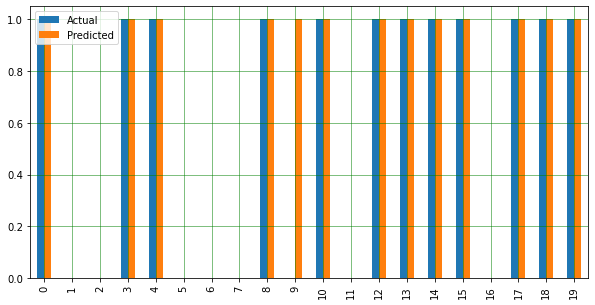

In [31]:
# Data Accuracy Visualization: Constructing Barplot of the above response       

df1 = df.head(20)
df1.plot(kind='bar',figsize=(10,5))
plt.grid(which='major', linestyle='-', linewidth='0.5', color='green')
plt.grid(which='minor', linestyle=':', linewidth='0.5', color='black')
plt.show()

***

## Deep Learning 

### Multi Layer Perceptron 

In [32]:
# Creating the model
model = MLPClassifier(hidden_layer_sizes = (100, 100), max_iter = 150)

# Feeding the training data to the model
model.fit(x_train, y_train)

# Calculating the accuracies
print("training accuracy :", model.score(x_train, y_train))
print("testing accuracy :", model.score(x_test, y_test))

training accuracy : 1.0
testing accuracy : 0.9583333333333334


### Artificial Neural Network 

In [33]:
# Creating the model
model = Sequential()

# First hidden layer
model.add(Dense(8, activation = 'relu'))

# Second hidden layer
model.add(Dense(8, activation = 'relu'))

# Output layer
model.add(Dense(1, activation = 'sigmoid'))

model.compile(optimizer='adam', loss='binary_crossentropy', metrics = ['accuracy'])

# Building the model:
history = model.fit(x_train, y_train, batch_size=25, epochs=100, verbose=2, validation_data=(x_test, y_test))

Epoch 1/100
4/4 - 16s - loss: 0.7673 - accuracy: 0.3936 - val_loss: 0.7431 - val_accuracy: 0.4583
Epoch 2/100
4/4 - 0s - loss: 0.7588 - accuracy: 0.4043 - val_loss: 0.7369 - val_accuracy: 0.4583
Epoch 3/100
4/4 - 0s - loss: 0.7521 - accuracy: 0.4149 - val_loss: 0.7312 - val_accuracy: 0.4583
Epoch 4/100
4/4 - 0s - loss: 0.7468 - accuracy: 0.4149 - val_loss: 0.7255 - val_accuracy: 0.4167
Epoch 5/100
4/4 - 0s - loss: 0.7414 - accuracy: 0.4043 - val_loss: 0.7200 - val_accuracy: 0.4583
Epoch 6/100
4/4 - 0s - loss: 0.7355 - accuracy: 0.4043 - val_loss: 0.7149 - val_accuracy: 0.4583
Epoch 7/100
4/4 - 0s - loss: 0.7304 - accuracy: 0.4149 - val_loss: 0.7101 - val_accuracy: 0.4583
Epoch 8/100
4/4 - 0s - loss: 0.7258 - accuracy: 0.4255 - val_loss: 0.7058 - val_accuracy: 0.5000
Epoch 9/100
4/4 - 0s - loss: 0.7208 - accuracy: 0.4149 - val_loss: 0.7018 - val_accuracy: 0.5000
Epoch 10/100
4/4 - 0s - loss: 0.7168 - accuracy: 0.4043 - val_loss: 0.6983 - val_accuracy: 0.5000
Epoch 11/100
4/4 - 0s - loss

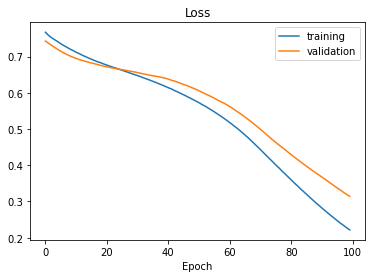

In [34]:
# Visualizing Loss / Epoch
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.legend(['training','validation'])
plt.title('Loss')
plt.xlabel('Epoch')
plt.show()

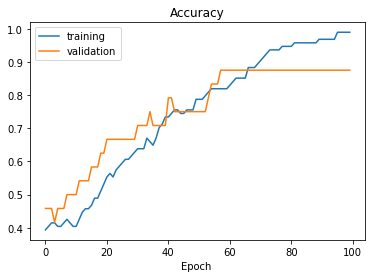

In [35]:
# Visualizing Accuracy / Epoch
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.legend(['training','validation'])
plt.title('Accuracy')
plt.xlabel('Epoch ')
plt.show()